In [76]:
import folium
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import json
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import platform
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. sorry~~~')

import pandas_datareader.data as web
from fbprophet import Prophet
from datetime import datetime
from pandas_datareader import data
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time 
from tqdm import tqdm_notebook
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import nltk
from konlpy.corpus import kobill

# 1.데이터를 분석하기 위해 파이썬 라이브러리를 import 하고, 첨부한엑셀파일을 로드 후, 6개의 Sheet 데이터를 병합하세요.

In [60]:
data_exam = pd.read_excel('../data/test9.xlsx', sheet_name=None)
data_exam_df = pd.concat(data_exam, ignore_index=True)
data_exam_df.tail()

,REGDATE,HIT,KEYWORD
295,2016-11-09,1517,안경;근시;망막;백내장;스마트폰;도파민;안과
296,2016-11-14,1217,프록시마 b;골디락스;보이저 1호;프록시마 센타우리;페가수스;적색왜성
297,2016-11-16,1246,유방암;유두;여성형 유방;클라인펠터 증후군;여성호르몬;간
298,2016-11-21,968,스마트시티;사물인터넷;신흥국;선진국;밀리언 프로젝트
299,2016-11-30,797,다이아몬드;탄소;질소;카나리아;내포물;원석


In [61]:
token_data = ''
for i in data_exam_df['KEYWORD']:
    token_data = token_data + '; '+i

In [62]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(token_data)

C:\Users\A\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [77]:
ko = nltk.Text(tokens_ko, name = '키워드')

# 2. 주요 키워드를 분석하여 아래와 같은 Word Cloud를 생성하세요

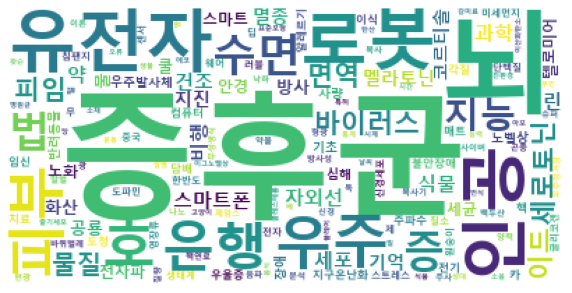

In [64]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgunbd.ttf',
                     relative_scaling = 0.3,
                     background_color = 'white').generate_from_frequencies(dict(data))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 3. 조회수 예측

In [69]:
data_exam_df['REGDATE'] =pd.to_datetime(data_exam_df['REGDATE'])

In [73]:
df = pd.DataFrame({'ds':data_exam_df['REGDATE'], 'y':data_exam_df['HIT']})
df.reset_index(inplace = True)
del df['index']
df.tail()

,ds,y
295,2016-11-09,1517
296,2016-11-14,1217
297,2016-11-16,1246
298,2016-11-21,968
299,2016-11-30,797


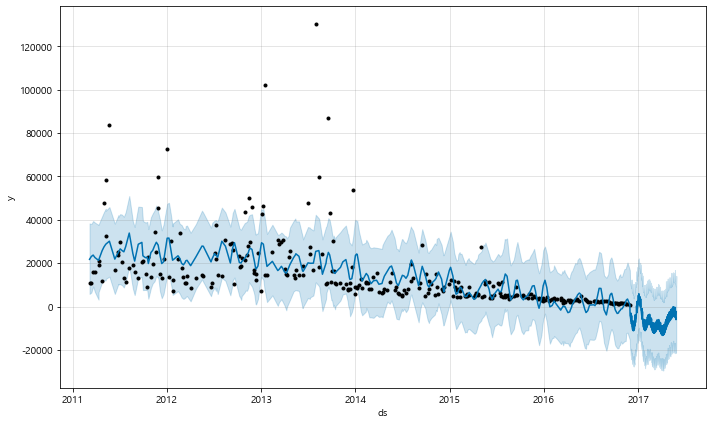

In [79]:
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods = 180)
forecast = m.predict(future)
m.plot(forecast);